In [1]:
# # Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

from sklearn.feature_selection import VarianceThreshold
# from keras.backend import manual_variable_initialization 
# # manual_variable_initialization(True)

Using TensorFlow backend.


In [3]:
data_p = pd.read_csv("points.csv",dtype=object,error_bad_lines=False) 
data_p.head()
data_p["id"] = data_p["id"].map(str) +"_"+ data_p["dir"]
data_p.head()
# data_p.dtypes

,s.no,id,dir,path,date,x1,y1,x2,y2,x3,...,x9996,y9996,x9997,y9997,x9998,y9998,x9999,y9999,x10000,y10000
0,1,ON_1_20181031_173504_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.2,0.03,0.2,...,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14
1,2,OFF_4_20181031_173921_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.4,0.12,0.2,0.12,0.2,...,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03
2,3,OFF_2_20181031_173628_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.13,0.0,0.12,0.0,...,25.0,0.03,25.0,0.03,25.0,0.02,25.0,0.02,25.0,0.03
3,4,ON_3_20181031_173800_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.4,0.02,0.4,...,0.2,0.14,0.0,0.14,0.2,0.14,0.2,0.14,0.2,0.14
4,5,OFF_4_20181102_085018_103,103,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,02/11/2018,0.2,0.15,0.2,0.16,0.2,...,25.0,0.05,25.0,0.06,25.0,0.05,25.2,0.05,25.0,0.05


In [4]:

data_v = pd.read_csv("values.csv",dtype=object,error_bad_lines=False )
le = preprocessing.LabelEncoder()

data_v['power_state_spec'] = le.fit_transform(data_v['power_state_spec'].astype('str'))

data_v['power_state_value'] = le.fit_transform(data_v['power_state_value'].astype('str'))
data_v["id"] = data_v["id"].map(str) +"_"+data_v["dir"]
data_v.head()

,s.no,id,dir,_file_,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,1,ON_1_20181031_173504_104,104,HEGSE_72.HTM,1,89.990000000000,150.000000000000,405.992200000000,1,60,510.204,800,C,NC,C,C
1,2,OFF_2_20181031_173628_104,104,HEGSE_72.HTM,0,7.992000000000,30.000000000000,-56.000000000000,0,10,510.204,-100,C,C,C,C
2,3,ON_3_20181031_173800_104,104,HEGSE_72.HTM,1,89.950000000000,140.000000000000,405.992200000000,1,60,495.049,800,C,NC,C,C
3,4,OFF_4_20181031_173921_104,104,HEGSE_72.HTM,0,7.997000000000,30.000000000000,-58.000000000000,0,10,495.049,-100,C,C,C,C
4,5,ON_1_20181102_084600_103,103,HEGSE_72.HTM,1,56.650000000000,169.800000000000,405.992200000000,1,60,510.204,800,C,C,C,C


In [5]:
arr_v = data_v.values
arr_p = data_p.values

In [6]:
arr_v = arr_v[0:]
# print(arr_v)
arr_p = arr_p[0:]
# print(arr_p)

In [7]:
ON_list =[]
OFF_list = []
for i in range(len(arr_p)):
    s = arr_p[i][1]
    s = str(s)
    
#     print(type(st))
    if s.find("N") == -1:
        OFF_list.append(arr_p[i])
    
    else:
        ON_list.append(arr_p[i])
# calculating for ON
print(len(ON_list),"ON")
print(len(OFF_list),"OFF")
arr_on_p = np.array(ON_list)
# print(arr_on_p)

426 ON
398 OFF


In [8]:
arr_on_p = np.delete(arr_on_p, 3,  axis=1)
arr_on_p_n = arr_on_p[:, 1::2]
arr_on_p_f = np.delete(arr_on_p_n, 1,  axis=1)
# print(len(arr_on_p_f))
# print(len(arr_on_p_f[0]))
# print(arr_on_p_f[0])

In [9]:
data = arr_on_p_f

df=pd.DataFrame(data=data[0:,0:],index=[i for i in range(data.shape[0])],
                columns=['y'+str(i) for i in range(data.shape[1])])
df.head()
# df.dtypes


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,ON_1_20181031_173504_104,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.15,0.14,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
1,ON_3_20181031_173800_104,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,...,0.14,0.15,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
2,ON_3_20181102_084856_103,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.16,0.17,0.17,0.17,0.17,0.17,0.17
3,ON_1_20181102_084600_103,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,...,0.17,0.16,0.16,0.17,0.17,0.17,0.17,0.17,0.16,0.17
4,ON_1_20181102_085847_102,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17


In [10]:
print(df.shape)
# for j in range(10000):
#   var = "y"+str(j+1)
#   df[var].fillna(df[var].mean(), inplace=True)
df_no_miss = df.dropna()
print(df_no_miss.shape)
print(df.shape)
df_no_miss.head()


(426, 10001)
(423, 10001)
(426, 10001)


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,ON_1_20181031_173504_104,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.15,0.14,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
1,ON_3_20181031_173800_104,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,...,0.14,0.15,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
2,ON_3_20181102_084856_103,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.16,0.17,0.17,0.17,0.17,0.17,0.17
3,ON_1_20181102_084600_103,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,...,0.17,0.16,0.16,0.17,0.17,0.17,0.17,0.17,0.16,0.17
4,ON_1_20181102_085847_102,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17


In [11]:
arr_p_no = df_no_miss.values
print(len(arr_p_no))

423


In [12]:
df1= df_no_miss.rename(index=str, columns={"y0": "id"})
df1.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,ON_1_20181031_173504_104,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.15,0.14,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
1,ON_3_20181031_173800_104,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,...,0.14,0.15,0.14,0.14,0.15,0.14,0.14,0.14,0.14,0.14
2,ON_3_20181102_084856_103,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.16,0.17,0.17,0.17,0.17,0.17,0.17
3,ON_1_20181102_084600_103,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,...,0.17,0.16,0.16,0.17,0.17,0.17,0.17,0.17,0.16,0.17
4,ON_1_20181102_085847_102,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17


In [13]:
print(df1.shape)
df2 = data_v
# print(df2.shape)
combine = (pd.merge(df1, df2, how='left', on='id'))
# print(df1.unique)
print(combine.shape)

(423, 10001)
(423, 10016)


In [14]:
combine.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,ON_1_20181031_173504_104,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,150.000000000000,405.992200000000,1.0,60,510.204,800,C,NC,C,C
1,ON_3_20181031_173800_104,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,...,140.000000000000,405.992200000000,1.0,60,495.049,800,C,NC,C,C
2,ON_3_20181102_084856_103,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,166.300000000000,405.992200000000,1.0,60,495.049,800,C,C,C,C
3,ON_1_20181102_084600_103,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,...,169.800000000000,405.992200000000,1.0,60,510.204,800,C,C,C,C
4,ON_1_20181102_085847_102,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,170.000000000000,401.312500000000,1.0,60,510.204,800,C,C,C,C


In [15]:
combine.iloc[:,0:10010].head()
k = combine.drop(['s.no','dir','_file_'], axis = 1) 

k.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,ON_1_20181031_173504_104,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,150.000000000000,405.992200000000,1.0,60,510.204,800,C,NC,C,C
1,ON_3_20181031_173800_104,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,...,140.000000000000,405.992200000000,1.0,60,495.049,800,C,NC,C,C
2,ON_3_20181102_084856_103,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,166.300000000000,405.992200000000,1.0,60,495.049,800,C,C,C,C
3,ON_1_20181102_084600_103,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,...,169.800000000000,405.992200000000,1.0,60,510.204,800,C,C,C,C
4,ON_1_20181102_085847_102,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,170.000000000000,401.312500000000,1.0,60,510.204,800,C,C,C,C


In [16]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

# print(input_1.iloc[:,10008])
miss = input_1.iloc[:,1:]
miss.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.14,0.14,1.0,89.990000000000,150.000000000000,405.992200000000,1.0,60,510.204,800
1,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,0.03,...,0.14,0.14,1.0,89.950000000000,140.000000000000,405.992200000000,1.0,60,495.049,800
2,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,1.0,36.970000000000,166.300000000000,405.992200000000,1.0,60,495.049,800
3,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,0.06,...,0.16,0.17,1.0,56.650000000000,169.800000000000,405.992200000000,1.0,60,510.204,800
4,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,1.0,37.040000000000,170.000000000000,401.312500000000,1.0,60,510.204,800


In [17]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

miss = input_1.iloc[:,1:]
miss.head()



  
for column in (miss.iloc[:,10000:]):
  su = 0
  div = 0
  for r in range(miss.shape[0]):
    if (pd.isna(miss[column][r]))== False:
      su = float(miss[column][r])+su

      div = div+1

  fin = float(su/div)

  miss[column].fillna(float(fin),inplace=True)
#########converting ever
# thing into float
miss =miss.astype('float64')
# print(miss.dtypes)
miss.head()


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.14,0.14,1.0,89.99,150.0,405.9922,1.0,60.0,510.204,800.0
1,0.03,0.02,0.04,0.03,0.03,0.03,0.04,0.03,0.03,0.03,...,0.14,0.14,1.0,89.95,140.0,405.9922,1.0,60.0,495.049,800.0
2,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,1.0,36.97,166.3,405.9922,1.0,60.0,495.049,800.0
3,0.05,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.06,0.06,...,0.16,0.17,1.0,56.65,169.8,405.9922,1.0,60.0,510.204,800.0
4,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.17,0.17,1.0,37.04,170.0,401.3125,1.0,60.0,510.204,800.0


In [18]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import robust_scale

scaler_min_x = MinMaxScaler()
scaler_min_y = MinMaxScaler()

scaler_norm_x = Normalizer()
scaler_norm_y = Normalizer()

scaler_stan_x = StandardScaler()
scaler_stan_y = StandardScaler()

scalar_qt_x =QuantileTransformer(output_distribution='uniform')
scalar_qt_y =QuantileTransformer(output_distribution='uniform')
       

In [19]:
rand_na = miss
# print(miss.shape)
input_1_arr = rand_na.values
input_1_arr[:,:]= input_1_arr[:,:].astype('float64')

X = input_1_arr[:,0:10000]*1000
Y = input_1_arr[:,10002:10004]
# print(X.shape)
# print(Y.shape)
# print(Y)
y=np.reshape(Y, (-1,1))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train= X
y_train= Y


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train)
scaler_min_y = MinMaxScaler().fit(y_train)

X_minmax_train = scaler_min_x.transform(X_train)
Y_minmax_train = scaler_min_y.transform(y_train)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train)
scaler_stan_y = StandardScaler().fit(y_train)


X_stan_train = scaler_stan_x.transform(X_train)
Y_stan_train = scaler_stan_y.transform(y_train)

#######normlised
scaler_norm_x = Normalizer().fit(X_train)
scaler_norm_y = Normalizer().fit(y_train)


X_norm_train = scaler_norm_x.transform(X_train)
Y_norm_train = scaler_norm_y.transform(y_train)


# ################qt

scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train)
scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train)


X_qt_train = scaler_qt_x.transform(X_train)
Y_qt_train = scaler_qt_y.transform(y_train)


##robust

##robust
print(np.amax(X_train[0,:]))
print(np.amax(y_train[0,:]))

X_train = np.concatenate((X_train, y_train), axis=1)
# print(np.amax(X_train[0,:]))
X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train,"after")
# print(y_train.shape,"after")

scaler_rob_x = MinMaxScaler().fit(X_train_t)
# scaler_rob_y = RobustScaler().fit(y_train_t)


X_rob_train = scaler_rob_x.transform(X_train_t)
# Y_rob_train = scaler_rob_x.transform(y_train_t)

X_rob_train = X_rob_train.transpose()
# Y_rob_train = Y_rob_train.transpose()

print(X_rob_train.shape)
# print(Y_rob_train.shape)
# print(Y_rob_train)

Y_rob_train = X_rob_train[:,10000:10002]
X_rob_train = X_rob_train[:,0:10000]
# print(Y_rob_train)
# print(X_rob_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (423). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (423). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


410.0
405.9922
(423, 10002)


In [20]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_rob_train)
X_new = factor_fit.transform(X_rob_train)
X_new.shape

(423, 30)

In [21]:

import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_on.pkl", "wb" ) )



In [22]:
def baseline_model_30(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(28, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(30,)))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model


In [23]:
model = baseline_model_30()

print (model.get_weights())
# estimator = train_data_nn(X_new, Y_rob_train)

print(X_new.shape)
print(y_train.shape)
history = model.fit(X_new,  Y_rob_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.0)

Instructions for updating:
Colocations handled automatically by placer.
[array([[-3.30190593e-03,  3.35075818e-02,  2.67684102e-01,
         1.17216315e-02,  4.13080722e-01, -4.09473293e-02,
        -3.25645268e-01,  7.03441128e-02, -2.21359015e-01,
         1.91263601e-01, -3.11688244e-01,  2.64019705e-02,
         4.20207456e-02,  5.09603648e-03, -1.75092846e-01,
         1.57767922e-01,  1.76742807e-01, -3.58492523e-01,
         2.66578734e-01, -1.19954646e-01, -4.50166538e-02,
         1.31254122e-01,  4.04463440e-01, -4.22014557e-02,
        -2.19220340e-01, -1.57251909e-01,  1.50504470e-01,
         4.29330617e-01],
       [ 1.59135729e-01,  4.98907454e-02,  3.97246093e-01,
        -3.58208686e-01, -3.62375379e-01, -1.59355670e-01,
         1.70376450e-01, -1.70957342e-01,  3.37092727e-01,
        -2.44644225e-01,  3.45548689e-02, -9.10185128e-02,
         3.23140323e-01, -2.89740771e-01, -5.68562150e-01,
         3.07472289e-01,  2.47859538e-01,  9.57533270e-02,
         1.16877

Epoch 1/200
423/423 [==============================] - 1s 1ms/step - loss: 0.7191 - mean_absolute_error: 0.6367
Epoch 2/200
423/423 [==============================] - 0s 267us/step - loss: 0.3387 - mean_absolute_error: 0.4509
Epoch 3/200
423/423 [==============================] - 0s 284us/step - loss: 0.2510 - mean_absolute_error: 0.3767
Epoch 4/200
423/423 [==============================] - 0s 294us/step - loss: 0.1859 - mean_absolute_error: 0.3306
Epoch 5/200
423/423 [==============================] - 0s 287us/step - loss: 0.1405 - mean_absolute_error: 0.2841
Epoch 6/200
423/423 [==============================] - 0s 284us/step - loss: 0.1225 - mean_absolute_error: 0.2663
Epoch 7/200
423/423 [==============================] - 0s 276us/step - loss: 0.1028 - mean_absolute_error: 0.2401
Epoch 8/200
423/423 [==============================] - 0s 274us/step - loss: 0.0818 - mean_absolute_error: 0.2208
Epoch 9/200
423/423 [==============================] - 0s 275us/step - loss: 0.0696 - mean

423/423 [==============================] - 0s 282us/step - loss: 0.0168 - mean_absolute_error: 0.0710
Epoch 73/200
423/423 [==============================] - 0s 317us/step - loss: 0.0169 - mean_absolute_error: 0.0703
Epoch 74/200
423/423 [==============================] - 0s 349us/step - loss: 0.0165 - mean_absolute_error: 0.0710
Epoch 75/200
423/423 [==============================] - 0s 315us/step - loss: 0.0162 - mean_absolute_error: 0.0699
Epoch 76/200
423/423 [==============================] - 0s 264us/step - loss: 0.0166 - mean_absolute_error: 0.0702
Epoch 77/200
423/423 [==============================] - 0s 270us/step - loss: 0.0159 - mean_absolute_error: 0.0686
Epoch 78/200
423/423 [==============================] - 0s 262us/step - loss: 0.0170 - mean_absolute_error: 0.0683
Epoch 79/200
423/423 [==============================] - 0s 263us/step - loss: 0.0155 - mean_absolute_error: 0.0670
Epoch 80/200
423/423 [==============================] - 0s 267us/step - loss: 0.0159 - mean_a

Epoch 143/200
423/423 [==============================] - 0s 327us/step - loss: 0.0116 - mean_absolute_error: 0.0526
Epoch 144/200
423/423 [==============================] - 0s 274us/step - loss: 0.0113 - mean_absolute_error: 0.0518
Epoch 145/200
423/423 [==============================] - 0s 321us/step - loss: 0.0116 - mean_absolute_error: 0.0543
Epoch 146/200
423/423 [==============================] - 0s 269us/step - loss: 0.0119 - mean_absolute_error: 0.0532
Epoch 147/200
423/423 [==============================] - 0s 262us/step - loss: 0.0109 - mean_absolute_error: 0.0488
Epoch 148/200
423/423 [==============================] - 0s 258us/step - loss: 0.0109 - mean_absolute_error: 0.0504
Epoch 149/200
423/423 [==============================] - 0s 261us/step - loss: 0.0109 - mean_absolute_error: 0.0500
Epoch 150/200
423/423 [==============================] - 0s 264us/step - loss: 0.0112 - mean_absolute_error: 0.0495
Epoch 151/200
423/423 [==============================] - 0s 259us/step -

In [24]:
def visualize_learning_curve(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['mean_absolute_error'])
#     plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [25]:

# print(X_test.shape)
# X_test_t = X_test.transpose()
# print(X_test_t.shape)
# scaler_rob_x = MinMaxScaler().fit(X_test_t)
# X_new_test_t = scaler_rob_x.transform(X_test_t)
# X_new_test = X_new_test_t.transpose()
# print(X_new_test.shape)

# y_test_t = y_test.transpose()
# # scaler_rob_y = RobustScaler().fit(y_test_t)
# Y_new_test_t = scaler_rob_x.transform(y_test_t)
# Y_new_test = Y_new_test_t.transpose()

# X_new_test = factor_fit.transform(X_new_test)
# print(X_new_test.shape)

# visualize_learning_curve(history)

0.01660702163439875
dict_keys(['loss', 'mean_absolute_error'])


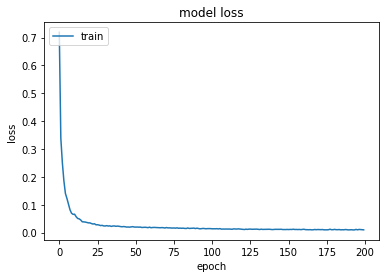

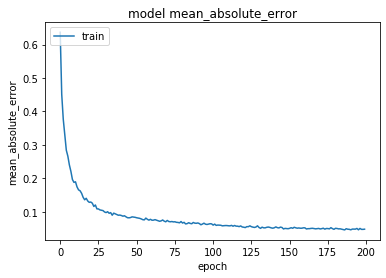

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred = model.predict((X_new))
# print(pred)

mse = (mean_squared_error(Y_rob_train,pred))

print(mse)
visualize_learning_curve(history)

In [27]:

X1 = input_1_arr[:,0:10000]*1000
Y1 = input_1_arr[:,10000:10004]

X=X1
Y=Y1[:,2:4]
# print(Y)
Y_new = np.zeros((Y.shape[0],2))
for i in range(len(Y)):
  
    print(Y[i],"y")
  

    X_t= X[i].transpose()

    scaler_rob_x = MinMaxScaler().fit((X_t.reshape(-1, 1)))
                        
    Xi = (scaler_rob_x.transform(X_t.reshape(-1, 1)))

    I = factor_fit.transform(Xi.transpose())

    pred = model.predict(I)

  
    Y_ti =Y[i].transpose()

#     scaler_rob_y = RobustScaler().fit(Y_ti.reshape(-1, 1))
    final_t = scaler_rob_x.inverse_transform(pred.reshape(-1, 1))
                                          

    final = final_t.transpose()
                                          
    print(final[0])

    h = abs(final-Y[i])
#   print(h,"h")
#     o=np.divide(h,Y[i])
#   print(o*100,"percentage") 
  
    Y_new[i]=final[0]


[150.     405.9922] y
[121.95505 413.75494]
[140.     405.9922] y
[120.48144 384.35986]
[166.3    405.9922] y
[145.05386 412.32504]
[169.8    405.9922] y
[126.44206 410.13956]
[170.     401.3125] y
[123.02895 399.83334]
[165.6    401.3125] y
[148.42896 404.93948]
[0.14      0.4013125] y
[ 20.618408 387.35318 ]
[0.14      0.4013125] y
[ 86.7335  385.50674]
[150.     648.7813] y
[144.23267 642.0848 ]
[145.     607.4063] y
[144.8572 606.7817]
[150.     624.5469] y
[148.12968 617.03925]
[155.     630.7813] y
[166.23186 629.8402 ]
[145.     625.6719] y
[135.80963 620.6267 ]
[145. 606.] y
[135.97372 602.6025 ]
[140.1    589.8125] y
[151.34833 585.60645]
[140.    569.875] y
[142.43434 568.50964]
[130.     626.3907] y
[184.79236 625.3649 ]
[120.     610.4219] y
[164.54382 608.276  ]
[170.     401.3125] y
[117.89168 398.0574 ]
[166.     401.3125] y
[169.37   405.1433]
[170.     401.3125] y
[120.858444 399.08298 ]
[168.9    401.3125] y
[151.28717 404.6252 ]
[166.4    401.3125] y
[149.02705 408.8

[-96.411    -42.402115]
[140.     401.3125] y
[109.49867 399.963  ]
[140.     401.3125] y
[121.411476 402.7572  ]
[139.7    674.6094] y
[145.61848 669.1254 ]
[135.1    659.0782] y
[147.2317  649.04034]
[145.     590.4063] y
[135.91647 585.4383 ]
[160.     401.3125] y
[103.78096 395.76266]
[159.3    401.3125] y
[150.91049 402.23962]
[160.     401.3125] y
[111.6908  398.49707]
[160.     401.3125] y
[117.02457 396.36438]
[159.4    401.3125] y
[129.7757  384.43637]
[158.8    401.3125] y
[127.01149 403.79337]
[150.     405.9922] y
[123.333725 377.90085 ]
[150.     405.9922] y
[114.909065 413.90244 ]
[140.     405.9922] y
[144.11714 412.7789 ]
[140.     405.9922] y
[122.25433 416.44168]
[150.     405.9922] y
[122.13   413.8154]
[140.     405.9922] y
[105.266594 408.9765  ]
[139.7    674.6094] y
[145.61848 669.1254 ]
[135.1    659.0782] y
[147.2317  649.04034]
[155.     648.0313] y
[159.2303 648.2556]
[125.     610.0782] y
[122.12054 603.70764]
[150.     649.2032] y
[147.74883 643.48096]
[140

[150.78915 617.9587 ]
[140.     596.5782] y
[137.52959 595.12225]
[140.     597.8907] y
[132.84344 593.50226]
[-140.      318.9219] y
[-162.77948  299.34357]
[-180.      264.4531] y
[-135.21086  251.05746]
[-1.3    -2.0156] y
[ 3.645624   -0.76954365]
[-4.3   -2.375] y
[-5.5383162 -7.9379644]
[160.     401.3125] y
[102.4238 395.2935]
[159.9    401.3125] y
[131.24045 374.23373]
[146.9    401.3125] y
[128.10657 406.75522]
[141.7    401.3125] y
[109.261215 400.24048 ]
[160.     401.3125] y
[113.198906 399.01843 ]
[155.2    401.3125] y
[127.03634 397.64423]
[163.5    401.3125] y
[140.87294 406.0019 ]
[160.1    401.3125] y
[135.97946 381.58093]


In [28]:
X1 = X1
Y1 = Y1
# print(Y1)

# print(Y)
from sklearn.metrics import r2_score
print(Y1[0,2], Y_new[0,0])
# print(Y_new[:,0])
g = r2_score(Y1[:,2], Y_new[:,0])  
g1 = r2_score(Y1[:,3], Y_new[:,1]) 
print(g,"r2 of stabilised")
print(g1,"r2 of max")
Y1[:,2]= Y_new[:,0]
Y1[:,3]= Y_new[:,1]
# print(Y1[0,2], Y_new[0,0])


150.0 121.95504760742188
0.8157412879590379 r2 of stabilised
0.5657677043331661 r2 of max


In [29]:

X1_new = np.concatenate((X1,Y1[:,2:4]),axis=1)
print(X1_new.shape)
Y1_new = Y1[:,0:2]
# print(Y1_new)
# X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X1_new, Y1_new, test_size=0.20)
X_train_c= X1_new
y_train_c = Y1_new

(423, 10002)


In [30]:
#standardise


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train_c)
scaler_min_y = MinMaxScaler().fit(y_train_c)

X_minmax_train = scaler_min_x.transform(X_train_c)
Y_minmax_train = scaler_min_y.transform(y_train_c)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train_c)
scaler_stan_y = StandardScaler().fit(y_train_c)


X_stan_train = scaler_stan_x.transform(X_train_c)
Y_stan_train = scaler_stan_y.transform(y_train_c)

# #######normlised
# scaler_norm_x = Normalizer().fit(X_train_c)
# scaler_norm_y = Normalizer().fit(y_train_c)


# X_norm_train = scaler_norm_x.transform(X_train_c)
# Y_norm_train = scaler_norm_y.transform(y_train_c)


# # ################qt

# scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train_c)
# scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train_c)


# X_qt_train = scaler_qt_x.transform(X_train_c)
# Y_qt_train = scaler_qt_y.transform(y_train_c)


##robust
# print(X_train.shape)
# print(y_train.shape)
# X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train.shape,"after")
# print(y_train.shape,"after")
scaler_rob_x = MinMaxScaler().fit(X_train_c)
scaler_rob_y = MinMaxScaler().fit(y_train_c)


# X_rob_train = scaler_rob_x.transform(X_train_c)
# Y_rob_train = scaler_rob_y.transform(y_train_c)

In [31]:
import pickle
pickle.dump(scaler_rob_x, open( "./app/MODEL/scaler_rob_x_1_ON.pkl", "wb" ) )
pickle.dump(scaler_rob_y, open( "./app/MODEL/scaler_rob_y_1_ON.pkl", "wb" ) )
X_rob_train_c = scaler_rob_x.transform(X_train_c)
Y_rob_train_c = scaler_rob_y.transform(y_train_c)



In [32]:
#apply PCA on X1_new
transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_rob_train_c[:,0:10000])
X_new1 = factor_fit.transform(X_rob_train_c[:,0:10000])
print(X_new1.shape)
X_new1 = np.concatenate((X_new1,X_rob_train_c[:,10000:10002]),axis=1)
print(X_new1.shape)
# print((X_rob_train[:,0:10000].shape))

(423, 30)
(423, 32)


In [33]:
import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_1_ON.pkl", "wb" ) )


In [34]:
def baseline_model_31(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(30, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(32,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model



In [35]:
model1 = baseline_model_31()

# estimator1 = train_data_nn_1(X_new1, Y_rob_train)

# print(X_new.shape)
# print(y_train.shape)
history_1 = model1.fit(X_new1,  Y_rob_train_c, epochs=400, batch_size=5,  verbose=1, validation_split=0.0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/400
423/423 [==============================] - 1s 2ms/step - loss: 1.8405 - mean_absolute_error: 1.0977
Epoch 2/400
423/423 [==============================] - 0s 399us/step - loss: 1.0396 - mean_absolute_error: 0.7989
Epoch 3/400
423/423 [==============================] - 0s 406us/step - loss: 0.6961 - mean_absolute_error: 0.6570
Epoch 4/400
423/423 [==============================] - 0s 402us/step - loss: 0.4710 - mean_absolute_error: 0.5471
Epoch 5/400
423/423 [==============================] - 0s 400us/step - loss: 0.3944 - mean_absolute_error: 0.4881
Epoch 6/400
423/423 [==============================] - 0s 377us/step - loss: 0.3070 - mean_absolute_error: 0.4332
Epoch 7/400
423/423 [==============================] - 0s 411us/step - loss: 0.2100 - mean_absolute_error: 0.3627
Epoch 8/400
423/423 [==============================] - 0s 396us/step - loss: 0.1878 - mea

423/423 [==============================] - 0s 366us/step - loss: 0.0136 - mean_absolute_error: 0.0609
Epoch 70/400
423/423 [==============================] - 0s 434us/step - loss: 0.0142 - mean_absolute_error: 0.0632
Epoch 71/400
423/423 [==============================] - 0s 421us/step - loss: 0.0141 - mean_absolute_error: 0.0629
Epoch 72/400
423/423 [==============================] - 0s 421us/step - loss: 0.0130 - mean_absolute_error: 0.0594
Epoch 73/400
423/423 [==============================] - 0s 419us/step - loss: 0.0140 - mean_absolute_error: 0.0610
Epoch 74/400
423/423 [==============================] - 0s 423us/step - loss: 0.0132 - mean_absolute_error: 0.0597
Epoch 75/400
423/423 [==============================] - 0s 381us/step - loss: 0.0137 - mean_absolute_error: 0.0620
Epoch 76/400
423/423 [==============================] - 0s 408us/step - loss: 0.0139 - mean_absolute_error: 0.0616
Epoch 77/400
423/423 [==============================] - 0s 406us/step - loss: 0.0140 - mean_a

423/423 [==============================] - 0s 386us/step - loss: 0.0122 - mean_absolute_error: 0.0516
Epoch 141/400
423/423 [==============================] - 0s 361us/step - loss: 0.0123 - mean_absolute_error: 0.0519
Epoch 142/400
423/423 [==============================] - 0s 370us/step - loss: 0.0126 - mean_absolute_error: 0.0526
Epoch 143/400
423/423 [==============================] - 0s 359us/step - loss: 0.0126 - mean_absolute_error: 0.0523
Epoch 144/400
423/423 [==============================] - 0s 362us/step - loss: 0.0126 - mean_absolute_error: 0.0519
Epoch 145/400
423/423 [==============================] - 0s 371us/step - loss: 0.0118 - mean_absolute_error: 0.0504
Epoch 146/400
423/423 [==============================] - 0s 389us/step - loss: 0.0127 - mean_absolute_error: 0.0525
Epoch 147/400
423/423 [==============================] - 0s 357us/step - loss: 0.0120 - mean_absolute_error: 0.0523
Epoch 148/400
423/423 [==============================] - 0s 348us/step - loss: 0.0125 

423/423 [==============================] - 0s 690us/step - loss: 0.0117 - mean_absolute_error: 0.0504
Epoch 211/400
423/423 [==============================] - 0s 1ms/step - loss: 0.0120 - mean_absolute_error: 0.0482
Epoch 212/400
423/423 [==============================] - 0s 597us/step - loss: 0.0118 - mean_absolute_error: 0.0474
Epoch 213/400
423/423 [==============================] - 0s 554us/step - loss: 0.0111 - mean_absolute_error: 0.0463
Epoch 214/400
423/423 [==============================] - 0s 585us/step - loss: 0.0115 - mean_absolute_error: 0.0479
Epoch 215/400
423/423 [==============================] - 0s 637us/step - loss: 0.0118 - mean_absolute_error: 0.0489
Epoch 216/400
423/423 [==============================] - 0s 551us/step - loss: 0.0119 - mean_absolute_error: 0.0487
Epoch 217/400
423/423 [==============================] - 0s 588us/step - loss: 0.0116 - mean_absolute_error: 0.0475
Epoch 218/400
423/423 [==============================] - 0s 727us/step - loss: 0.0109 - 

423/423 [==============================] - 0s 377us/step - loss: 0.0114 - mean_absolute_error: 0.0478
Epoch 281/400
423/423 [==============================] - 0s 367us/step - loss: 0.0109 - mean_absolute_error: 0.0465
Epoch 282/400
423/423 [==============================] - 0s 352us/step - loss: 0.0112 - mean_absolute_error: 0.0475
Epoch 283/400
423/423 [==============================] - 0s 355us/step - loss: 0.0114 - mean_absolute_error: 0.0491
Epoch 284/400
423/423 [==============================] - 0s 384us/step - loss: 0.0112 - mean_absolute_error: 0.0461
Epoch 285/400
423/423 [==============================] - 0s 387us/step - loss: 0.0112 - mean_absolute_error: 0.0474
Epoch 286/400
423/423 [==============================] - 0s 352us/step - loss: 0.0117 - mean_absolute_error: 0.0463
Epoch 287/400
423/423 [==============================] - 0s 354us/step - loss: 0.0108 - mean_absolute_error: 0.0448
Epoch 288/400
423/423 [==============================] - 0s 446us/step - loss: 0.0109 

423/423 [==============================] - 0s 467us/step - loss: 0.0114 - mean_absolute_error: 0.0480
Epoch 351/400
423/423 [==============================] - 0s 498us/step - loss: 0.0108 - mean_absolute_error: 0.0466
Epoch 352/400
423/423 [==============================] - 0s 531us/step - loss: 0.0109 - mean_absolute_error: 0.0475
Epoch 353/400
423/423 [==============================] - 0s 420us/step - loss: 0.0113 - mean_absolute_error: 0.0475
Epoch 354/400
423/423 [==============================] - 0s 461us/step - loss: 0.0106 - mean_absolute_error: 0.0455
Epoch 355/400
423/423 [==============================] - 0s 424us/step - loss: 0.0101 - mean_absolute_error: 0.0446
Epoch 356/400
423/423 [==============================] - 0s 475us/step - loss: 0.0103 - mean_absolute_error: 0.0451
Epoch 357/400
423/423 [==============================] - 0s 432us/step - loss: 0.0104 - mean_absolute_error: 0.0454
Epoch 358/400
423/423 [==============================] - 0s 486us/step - loss: 0.0113 

(423, 2)
0.009781519908468818
dict_keys(['loss', 'mean_absolute_error'])


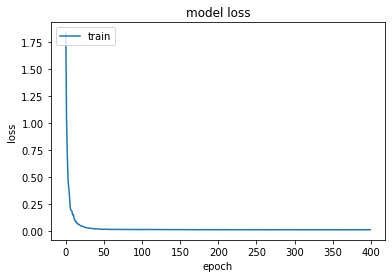

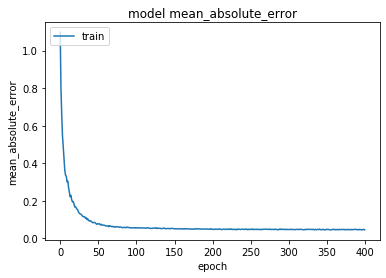

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred_c = model1.predict((X_new1))
print(pred_c.shape)

mse = (mean_squared_error(Y_rob_train_c,pred_c))

print(mse)
visualize_learning_curve(history_1)


In [37]:
Final = []
# print(y_train_c)
for i in range(len(y_train_c)):
  
#     print(y_train_c[i],"ytest[i]")
#     print(X_train_c[i])
    
    X_c = (scaler_rob_x.transform(X_train_c[i].reshape(1, -1)))
    k = []

#     print(X_c)
    I = factor_fit.transform(X_c[:,0:10000])
    I = np.concatenate((I,X_c[:,10000:10002]),axis=1)
#   print(I.shape,"I shape")

    pred_c = model1.predict(I)
#     print(pred_c,"pred_c.shape")
  
 

  
    final = scaler_rob_y.inverse_transform(pred_c.reshape(1, -1))
#     print(final,"final")                               
    final[0][0]= np.abs(np.round(final[0][0]))
                                          
#     print(final[0],"final")
    k.append(final[0][0])
    k.append(final[0][1])
    Final.append(k)

    h = abs(final[0]-y_train_c[i])
Final_np = np.asarray(Final, dtype=np.float32)    
# print(Final)
print(y_train_c[100,1], Final_np[100,1])
r2_time = r2_score(y_train_c[:,1], Final_np[:,1]) 
print(r2_time,"stabilization time")

36.92 42.137985
0.30369932072710615 stabilization time


In [38]:

from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)
model.save ("./app/MODEL/my_model_ON.h5")
model1.save ("./app/MODEL/my_model_1_ON.h5")





# print(model.get_weights())

# print (model1.get_weights())
model1.save_weights("on_1.h5")

In [39]:
# from keras.models import load_model
# new_model = load_model('my_model_ON.h5')
# new_model_1 = load_model('my_model_1_ON.h5')

In [40]:
# pred = new_model_1.predict((X_new1))
# print(pred.shape)

# mse = (mean_squared_error(Y_rob_train,pred))

# print(mse)